### TF IDF

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#jumlah dataset awal 6270

In [3]:
data = pd.read_csv('review_mobile-first-shooting_2023.csv', on_bad_lines='skip')

In [4]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,947aeb77-208e-445a-a791-8187e27f37ef,John Pelos,https://play-lh.googleusercontent.com/a-/AD_cM...,When you get to a higher rank they put trash t...,1,16,1.6.39,2023-06-17 15:33:27,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
1,a06d5839-f8ca-482a-8fa7-922fceb17267,jude machina,https://play-lh.googleusercontent.com/a/AAcHTt...,I didn't recommend this in low device so low q...,1,14,1.6.39,2023-06-18 12:53:31,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
2,79df8cac-5414-489e-a3d6-2666f6cbdbe9,フィトリFitorisama,https://play-lh.googleusercontent.com/a-/AD_cM...,"I've played codm since season 1. Back then, it...",1,13,1.6.39,2023-06-18 08:49:40,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
3,57c055e6-ab67-4161-945f-7ecdcdb05bc5,Sam Lee,https://play-lh.googleusercontent.com/a/AAcHTt...,Bad experience i just got a little bad network...,1,14,1.6.39,2023-06-12 01:42:03,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
4,65ad15e2-8d65-4d34-bf6f-ce323f55af19,Ralph Ocena,https://play-lh.googleusercontent.com/a-/AD_cM...,Hey! Game developers! What's wrong with you? T...,1,43,1.6.39,2023-05-26 15:06:50,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm


In [5]:
data.dropna(subset=['content'], inplace=True)
data.dropna(subset=['score'], inplace=True)

In [6]:
data['content'].isnull().sum()
data['score'].isnull().sum()

0

In [7]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,947aeb77-208e-445a-a791-8187e27f37ef,John Pelos,https://play-lh.googleusercontent.com/a-/AD_cM...,When you get to a higher rank they put trash t...,1,16,1.6.39,2023-06-17 15:33:27,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
1,a06d5839-f8ca-482a-8fa7-922fceb17267,jude machina,https://play-lh.googleusercontent.com/a/AAcHTt...,I didn't recommend this in low device so low q...,1,14,1.6.39,2023-06-18 12:53:31,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
2,79df8cac-5414-489e-a3d6-2666f6cbdbe9,フィトリFitorisama,https://play-lh.googleusercontent.com/a-/AD_cM...,"I've played codm since season 1. Back then, it...",1,13,1.6.39,2023-06-18 08:49:40,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
3,57c055e6-ab67-4161-945f-7ecdcdb05bc5,Sam Lee,https://play-lh.googleusercontent.com/a/AAcHTt...,Bad experience i just got a little bad network...,1,14,1.6.39,2023-06-12 01:42:03,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm
4,65ad15e2-8d65-4d34-bf6f-ce323f55af19,Ralph Ocena,https://play-lh.googleusercontent.com/a-/AD_cM...,Hey! Game developers! What's wrong with you? T...,1,43,1.6.39,2023-05-26 15:06:50,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm


In [8]:
#dataset 3282
len(data)

6000

In [11]:
data.iloc[900]["score"]

4

In [12]:
data['sentimen'] = data['score'].apply(
    lambda x: 'negative' if x <= "2" else (
        'positive' if x >= "4" else np.nan
    )
)

TypeError: '<=' not supported between instances of 'int' and 'str'

In [14]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId;;,sentimen
0,947aeb77-208e-445a-a791-8187e27f37ef,John Pelos,https://play-lh.googleusercontent.com/a-/AD_cM...,When you get to a higher rank they put trash t...,1,16,1.6.39,2023-06-17 15:33:27,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
3,57c055e6-ab67-4161-945f-7ecdcdb05bc5,Sam Lee,https://play-lh.googleusercontent.com/a/AAcHTt...,Bad experience i just got a little bad network...,1,14,1.6.39,2023-06-12 01:42:03,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
4,65ad15e2-8d65-4d34-bf6f-ce323f55af19,Ralph Ocena,https://play-lh.googleusercontent.com/a-/AD_cM...,Hey! Game developers! What's wrong with you? T...,1,43,1.6.39,2023-05-26 15:06:50,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
10,5b266c74-f970-4978-adb4-817059fc686a,Sharmaine Abalajon,https://play-lh.googleusercontent.com/a-/AD_cM...,Unfair matchmaking and please add additional p...,1,4,1.6.39,2023-06-15 01:45:17,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
11,132264ea-a5b8-45e3-8a5c-cb9a11088db4,Mathoj,https://play-lh.googleusercontent.com/a/AAcHTt...,I hate it every time when my game lags and the...,1,3,1.6.39,2023-06-18 02:54:52,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative


In [15]:
data.iloc[900]["sentimen"]

nan

In [16]:
# Drop rows with 'sentimen' set to null
data.dropna(subset=['sentimen'], inplace=True)

In [17]:
data.drop('score', axis=1, inplace=True)

In [18]:
count = data['sentimen'].value_counts()
print(count)

sentimen
positive    1258
negative     922
Name: count, dtype: int64


In [19]:
import re
from nltk.corpus import stopwords

# Pra-pemrosesan data
def preprocess_text(text):
    # Menghilangkan simbol dan emotikon
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U0001F600-\U0001F6FF]', '', text)

    # Mengubah huruf menjadi lowercase
    text = text.lower()

    # Menghilangkan stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)

    return text

# Melakukan pra-pemrosesan pada data ulasan
data['content'] = data['content'].apply(preprocess_text)


In [20]:
data.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId;;,sentimen
0,947aeb77-208e-445a-a791-8187e27f37ef,John Pelos,https://play-lh.googleusercontent.com/a-/AD_cM...,get higher rank put trash teammates plus snipe...,16,1.6.39,2023-06-17 15:33:27,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
3,57c055e6-ab67-4161-945f-7ecdcdb05bc5,Sam Lee,https://play-lh.googleusercontent.com/a/AAcHTt...,bad experience got little bad network suddenly...,14,1.6.39,2023-06-12 01:42:03,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
4,65ad15e2-8d65-4d34-bf6f-ce323f55af19,Ralph Ocena,https://play-lh.googleusercontent.com/a-/AD_cM...,hey game developers whats wrong many updates p...,43,1.6.39,2023-05-26 15:06:50,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
10,5b266c74-f970-4978-adb4-817059fc686a,Sharmaine Abalajon,https://play-lh.googleusercontent.com/a-/AD_cM...,unfair matchmaking please add additional punis...,4,1.6.39,2023-06-15 01:45:17,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative
11,132264ea-a5b8-45e3-8a5c-cb9a11088db4,Mathoj,https://play-lh.googleusercontent.com/a/AAcHTt...,hate every time game lags game forces quit los...,3,1.6.39,2023-06-18 02:54:52,NaN,NaN,1.6.39,most_relevant,com.garena.game.codm;;,negative


In [21]:
data.tail()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId;;,sentimen
6255,e6ca4cf2-437b-4801-a0bc-803d6bfda3ba,Raju Raut,https://play-lh.googleusercontent.com/a/AAcHTt...,ggh,0,NaN,2023-06-22 03:56:50,NaN,NaN,NaN,newest,com.GlobalSoFunny.Sausage;;,positive
6256,d748fb62-0dea-4ba4-b0fd-5005cf73392d,Md Ayan,https://play-lh.googleusercontent.com/a/AAcHTt...,op op op op op op,0,NaN,2023-06-22 02:31:59,NaN,NaN,NaN,newest,com.GlobalSoFunny.Sausage;;,positive
6257,c953afc6-8ba8-4044-aa6c-736b25634b8c,Luke Franco Montecillo,https://play-lh.googleusercontent.com/a-/AD_cM...,fav,0,NaN,2023-06-22 01:44:04,NaN,NaN,NaN,newest,com.GlobalSoFunny.Sausage;;,positive
6258,c570876d-347c-40c4-ae90-fc6115c2d23a,Chandra kant Gayen,https://play-lh.googleusercontent.com/a/AAcHTt...,verey good,0,NaN,2023-06-22 01:05:41,NaN,NaN,NaN,newest,com.GlobalSoFunny.Sausage;;,positive
6259,1ae572d4-f48d-4636-a3b7-056d09ddbb23,Adham Sayed,https://play-lh.googleusercontent.com/a/AAcHTt...,روعه اللعبه عباره عن ببجي و فورتنايت في بعض,0,15.67,2023-06-22 00:27:14,NaN,NaN,15.67,newest,com.GlobalSoFunny.Sausage;;,positive


In [22]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['sentimen'], test_size=0.2, random_state=42)

In [23]:
# Pembobotan TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [59]:
doc_index = 4 # Index of the document you want to print TF-IDF values for

content = data['content'][doc_index]  # Get the content of the document
tfidf_values = X_test_tfidf[doc_index].toarray()[0]  # Get the TF-IDF values for the document

# Get the feature names from the TfidfVectorizer
feature_names = tfidf.get_feature_names_out()

print("TF-IDF values for document", doc_index, "in the test set:")
print(content)

# Print non-zero TF-IDF values and their corresponding feature names
non_zero_indices = tfidf_values.nonzero()[0]
for index in non_zero_indices:
    feature_name = feature_names[index]
    tfidf_value = tfidf_values[index]
    print("Feature:", feature_name, "TF-IDF value:", tfidf_value)


TF-IDF values for document 4 in the test set:
hey game developers whats wrong many updates play store two downloads loading screen guys serious initialize loading screen repeat 7 times comparing resources another download whats catch cant make one download waste time
Feature: crimson TF-IDF value: 0.7598809481004654
Feature: pakistan TF-IDF value: 0.36796269985209124
Feature: spin TF-IDF value: 0.4171468390378313
Feature: suit TF-IDF value: 0.3364118174384533


In [33]:
# Pelatihan model analisis sentimen
model = svm.SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [60]:
# Prediksi sentimen pada data uji
y_pred = model.predict(X_test_tfidf)

In [61]:
# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [62]:
print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[120  64]
 [ 42 210]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.65      0.69       184
    positive       0.77      0.83      0.80       252

    accuracy                           0.76       436
   macro avg       0.75      0.74      0.75       436
weighted avg       0.76      0.76      0.75       436



In [63]:
# Menyimpan model
import pickle
pickle.dump(model, open('model_sentimen.sav', 'wb'))
pickle.dump(tfidf, open('tfidf.sav', 'wb'))

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

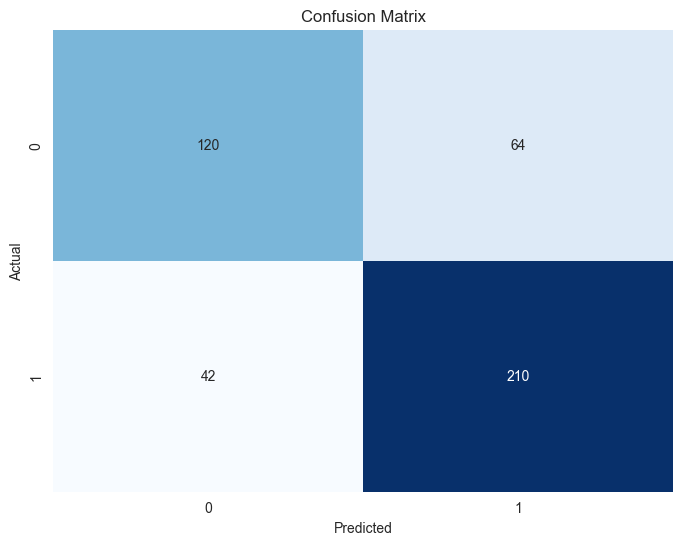

In [65]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

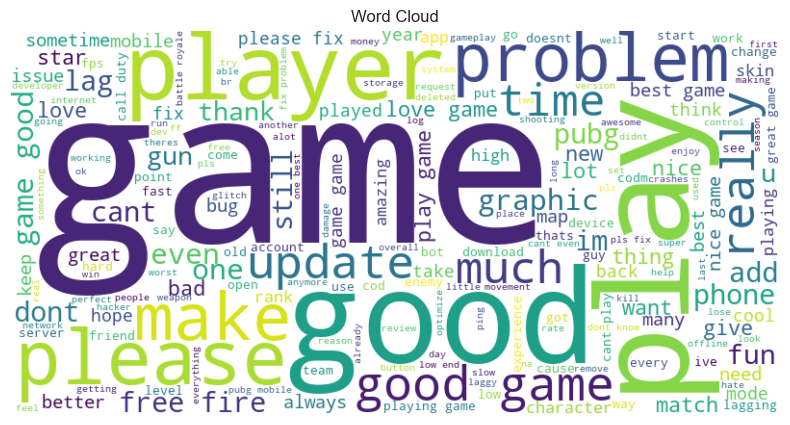

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have the preprocessed text data in a variable 'preprocessed_text'
text_data = data['content'].tolist()

# Combine the preprocessed text into a single string
text = ' '.join(text_data)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

### Count Vectorizer

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Pembobotan CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Pelatihan model analisis sentimen
model = svm.SVC(kernel='linear')
model.fit(X_train_count, y_train)

# Prediksi sentimen pada data uji
y_pred = model.predict(X_test_count)

# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[113  71]
 [ 37 215]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.61      0.68       184
    positive       0.75      0.85      0.80       252

    accuracy                           0.75       436
   macro avg       0.75      0.73      0.74       436
weighted avg       0.75      0.75      0.75       436



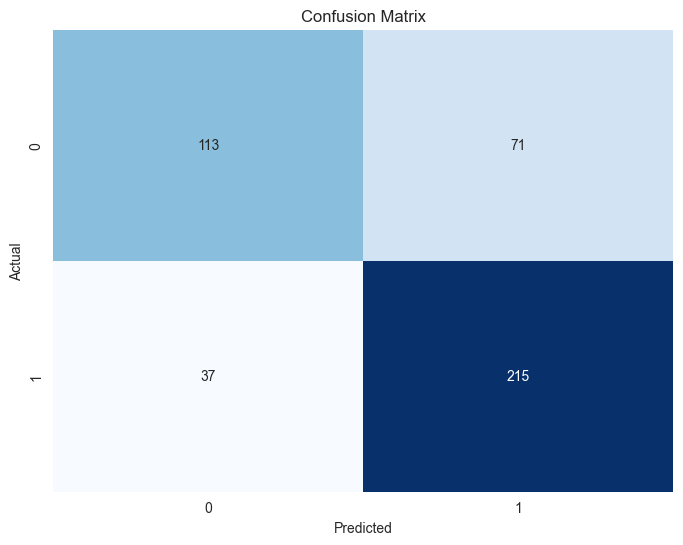

In [68]:
import pickle
pickle.dump(tfidf, open('countvect.sav', 'wb'))
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Hashing Vectorizer

In [71]:
from sklearn.feature_extraction.text import HashingVectorizer

# Pembobotan CountVectorizer
hashing_vectorizer = HashingVectorizer()
X_train_count = hashing_vectorizer.fit_transform(X_train)
X_test_count = hashing_vectorizer.transform(X_test)

# Pelatihan model analisis sentimen
model = svm.SVC(kernel='linear')
model.fit(X_train_count, y_train)

# Prediksi sentimen pada data uji
y_pred = model.predict(X_test_count)

# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[115  69]
 [ 42 210]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.62      0.67       184
    positive       0.75      0.83      0.79       252

    accuracy                           0.75       436
   macro avg       0.74      0.73      0.73       436
weighted avg       0.74      0.75      0.74       436



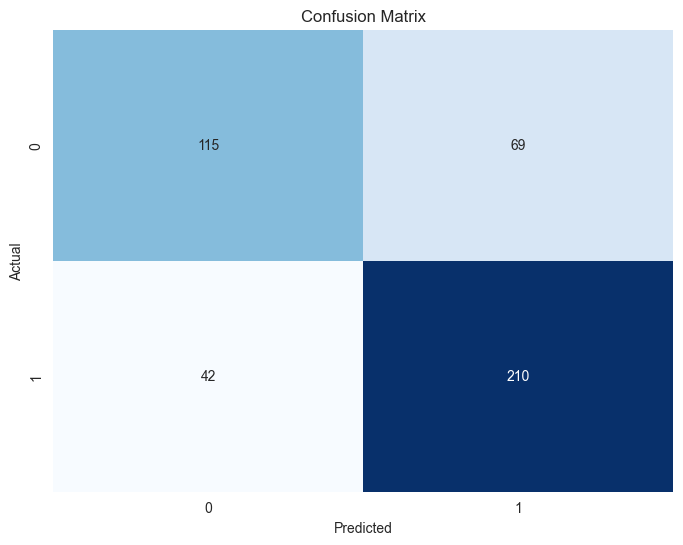

In [72]:
import pickle
pickle.dump(tfidf, open('hashing.sav', 'wb'))
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()